# 贝叶斯
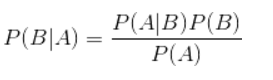
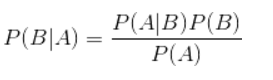

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [9]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666,test_size=0.3)

### 高斯模型
https://www.letiantian.me/2014-10-12-three-models-of-naive-nayes/
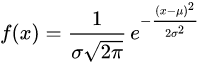

In [24]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
gaussian_clf.score(x_test,y_test)

0.9777777777777777

In [90]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
y_predict = gaussian_clf.predict(x_test)
con_mat = confusion_matrix(y_test,y_predict)

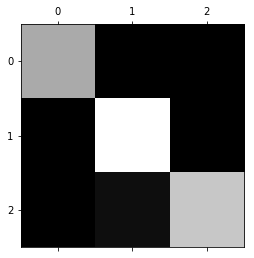

In [93]:
import matplotlib.pyplot as plt
plt.matshow(con_mat,cmap=plt.cm.gray)
plt.show()

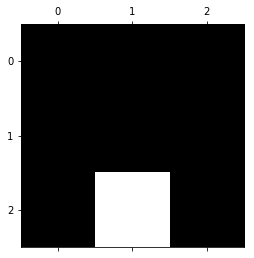

In [109]:
sum_con = np.sum(con_mat,axis=1)
new = con_mat / sum_con
np.fill_diagonal(new,0)
plt.matshow(new,cmap=plt.cm.gray)

In [112]:
precision_score(y_test,y_predict,average='micro')
recall_score(y_test,y_predict,average='micro')
f1_score(y_test,y_predict,average='micro')

0.9777777777777777

### 伯努利模型 和 多项式模型 主要做自然语言处理

In [78]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

y_predict2 = log_clf.predict(x_test)
confusion_matrix(y_test,y_predict2)

f1_score(y_test,y_predict2,average='micro')

decision_scores = log_clf.decision_function(x_train)



D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SVM --支持向量机
原理
https://pic1.zhimg.com/80/v2-197913c461c1953c30b804b4a7eddfcc_hd.jpg

和KNN一样，要做数据表缀化数据处理

有 hard svm 和 soft svm 的区别

### 优化
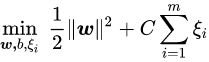

# 单层感知机
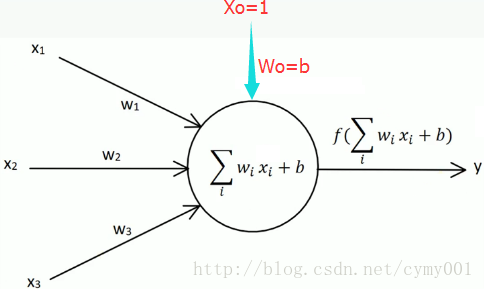

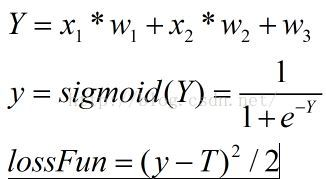

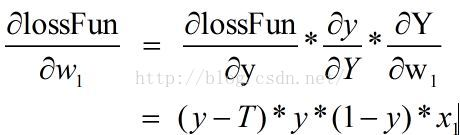

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
X = np.array([[1,3,3],
             [1,4,3],
            [1,1,1]])
Y = np.array([1,1,-1])

np.random.seed(666)
W = (np.random.random(3) - 0.5) * 2
W

array([0.40087424, 0.68837329, 0.35302867])

In [63]:
lr = 0.11
n = 0
p = 0

def update():
    global X, Y, W, lr, n
    n += 1
    p = np.sign(np.dot(X, W.T))
    w_c = lr * ((Y - p.T).dot(X)) / int(X.shape[0])
    W += w_c

In [64]:
for _ in range(100):
    update()
    print(W,n)
    p = np.sign(np.dot(X,W.T))
    if (p == Y.T).all():
        print(n)
        break

[0.32754091 0.61503995 0.27969534] 1
[0.25420758 0.54170662 0.20636201] 2
[0.18087424 0.46837329 0.13302867] 3
[0.10754091 0.39503995 0.05969534] 4
[ 0.03420758  0.32170662 -0.01363799] 5
[-0.03912576  0.24837329 -0.08697133] 6
[-0.11245909  0.17503995 -0.16030466] 7
[-0.03912576  0.39503995  0.05969534] 8
[-0.11245909  0.32170662 -0.01363799] 9
[-0.18579242  0.24837329 -0.08697133] 10
10


In [83]:
x1 = [3,4]
y1 = [3,3]
 
x2 = [1]
y2 = [5]

k = -W[1]/W[2]
d = -W[2]/W[1]

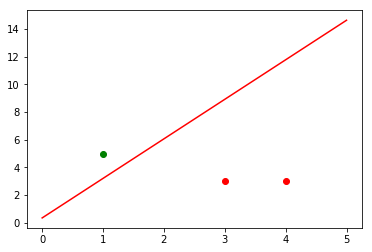

In [85]:
xdata = np.linspace(0,5)

plt.plot(xdata,xdata*k+d,'r')
plt.scatter(x1,y1,c='r')
plt.scatter(x2,y2,c='g')
plt.show()

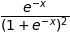

In [136]:
from  sympy import *
x,y = symbols('x y')
y = 1 / (1 + exp(-x))
diff(y,x)  #求导